In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({"a":[1,2,3],"b":[2,4,6],"c":[8,9,10]},index = ["voiture","vélo","trottinette"])

In [3]:
df

,a,b,c
voiture,1,2,8
vélo,2,4,9
trottinette,3,6,10


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [5]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/2 - Building Design - Intro to Pandas/simulation_data")

In [6]:
ls

 Baseline.csv                      'Scenario - Increase Setpoint.csv'
 Baseline.gsheet                   'Scenario - Low-E Glass.csv'
'Scenario - Aircon Schedules.csv'  'Scenario - Rooftop Gardens.csv'
'Scenario - Cool roof.csv'


In [7]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

In [8]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [9]:
baseline_data = pd.read_csv('Baseline.csv',index_col='Month')

In [10]:
baseline_data

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


In [11]:
baseline_data.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

In [12]:
baseline_data.columns

Index(['Baseline'], dtype='object')

In [13]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Baseline  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [15]:
baseline_data.Baseline

Month
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34
June         22.64
July         27.02
August       27.13
September    25.04
October      18.47
November     13.02
December      7.53
Name: Baseline, dtype: float64

In [20]:
baseline_data[baseline_data['Baseline'] < 10]

,Baseline
Month,
January,5.69
February,6.75
December,7.53


##Sort by values

In [24]:
baseline_data.sort_values('Baseline')

,Baseline
Month,
January,5.69
February,6.75
December,7.53
March,10.64
November,13.02
April,13.60
October,18.47
May,19.34
June,22.64


##Sort by index

In [25]:
baseline_data.sort_index()

,Baseline
Month,
April,13.60
August,27.13
December,7.53
February,6.75
January,5.69
July,27.02
June,22.64
March,10.64
May,19.34


##Select n random values from the table

In [23]:
baseline_data.sample(n=6)

,Baseline
Month,
November,13.02
August,27.13
March,10.64
December,7.53
October,18.47
June,22.64


In [26]:
baseline_data.rename(columns={'Baseline':'Baseline Cooling Consumption in GWh'})

,Baseline Cooling Consumption in GWh
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


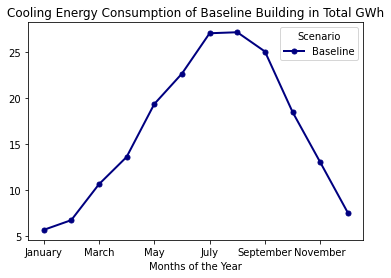

In [34]:
baseline_data.columns.name = 'Scenario'
baseline_data.index.name = 'Months of the Year'
baseline_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

##Analyze the cooling system within opening hours

In [36]:
schedule_scenario = pd.read_csv("Scenario - Aircon Schedules.csv", index_col="Month")

In [37]:
schedule_scenario

,Scenario - Aircon Schedules
Month,
January,5.61
February,6.50
March,9.70
April,11.95
May,16.52
June,18.89
July,22.13
August,22.14
September,20.38


Looks like the Schedule scenario uses less energy than the baseline - let's confirm this by combining the two DataFrames using the .concat() function

In [45]:
schedule_scenario.rename(columns={'Scenario - Aircon Schedules':'Cooling System when opening'})

Cooling System when opening,Cooling System when opening
Month,
January,5.61
February,6.50
March,9.70
April,11.95
May,16.52
June,18.89
July,22.13
August,22.14
September,20.38


In [46]:
combined_data = pd.concat([baseline_data, schedule_scenario], axis=1)

In [47]:
combined_data

,Baseline,Scenario - Aircon Schedules
January,5.69,5.61
February,6.75,6.50
March,10.64,9.70
April,13.60,11.95
May,19.34,16.52
June,22.64,18.89
July,27.02,22.13
August,27.13,22.14
September,25.04,20.38
October,18.47,15.87


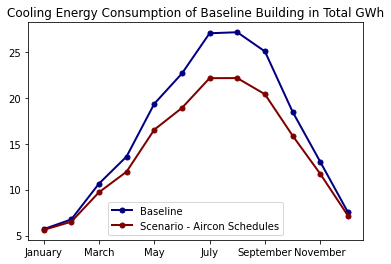

In [48]:
combined_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

## Make New Columns to Find the Difference between the options

Let's use a vector operation to create a new column to find the difference between the columns

In [55]:
combined_data['Difference (GWh)'] = combined_data['Baseline'] - combined_data['Scenario - Aircon Schedules']
combined_data

,Baseline,Scenario - Aircon Schedules,Difference (GWh)
January,5.69,5.61,0.08
February,6.75,6.50,0.25
March,10.64,9.70,0.94
April,13.60,11.95,1.65
May,19.34,16.52,2.82
June,22.64,18.89,3.75
July,27.02,22.13,4.89
August,27.13,22.14,4.99
September,25.04,20.38,4.66
October,18.47,15.87,2.60


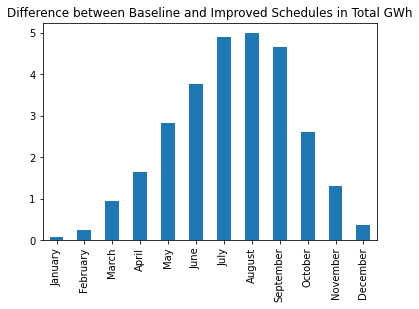

In [54]:
combined_data['Difference (GWh)'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

## Define a *function* object to create a new column

Let's say we only care to compare all the months except *July* -- we can define a function to calculate a new column

In [63]:
def get_difference_conditional(monthly_data):
  #print(monthly_data)
  if monthly_data.name == 'July' or monthly_data.name =='August':
    return 0
  else:
    return monthly_data['Baseline'] - monthly_data['Scenario - Aircon Schedules']

In [64]:
combined_data['Difference_NoJuly'] = combined_data.apply(lambda x: get_difference_conditional(x), axis=1)

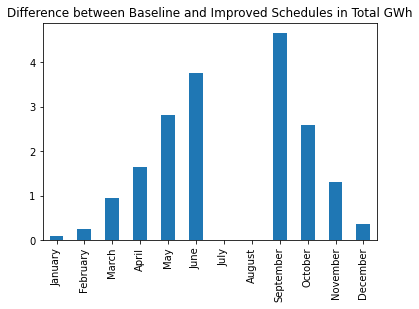

In [65]:
combined_data['Difference_NoJuly'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

##Compare several scenarios in the same time

In [66]:
os.listdir

<function posix.listdir>

In [67]:
ls

 Baseline.csv                      'Scenario - Increase Setpoint.csv'
 Baseline.gsheet                   'Scenario - Low-E Glass.csv'
'Scenario - Aircon Schedules.csv'  'Scenario - Rooftop Gardens.csv'
'Scenario - Cool roof.csv'


In [68]:
list_of_files = ['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

In [71]:
data_container = []
for filename in list_of_files:
  print(filename)
  df = pd.read_csv(filename, index_col='Month')
  data_container.append(df)

all_data = pd.concat(data_container, axis=1)

Scenario - Aircon Schedules.csv
Scenario - Cool roof.csv
Scenario - Rooftop Gardens.csv
Scenario - Increase Setpoint.csv
Scenario - Low-E Glass.csv
Baseline.csv


In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Scenario - Aircon Schedules   12 non-null     float64
 1   Scenario - Cool roof          12 non-null     float64
 2   Scenario - Rooftop Gardens    12 non-null     float64
 3   Scenario - Increase Setpoint  12 non-null     float64
 4   Scenario - Low-E Glass        12 non-null     float64
 5   Baseline                      12 non-null     float64
dtypes: float64(6)
memory usage: 992.0+ bytes


In [84]:
all_data

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,5.61,4.46,6.30,2.73,5.41,5.69
February,6.50,5.39,7.15,3.88,6.48,6.75
March,9.70,8.96,10.90,6.60,10.37,10.64
April,11.95,11.73,13.59,9.37,13.36,13.60
May,16.52,17.28,18.94,14.82,19.14,19.34
June,18.89,20.54,22.12,18.01,22.47,22.64
July,22.13,24.76,26.29,21.98,26.84,27.02
August,22.14,24.97,26.47,22.15,26.91,27.13
September,20.38,22.98,24.63,19.92,24.77,25.04


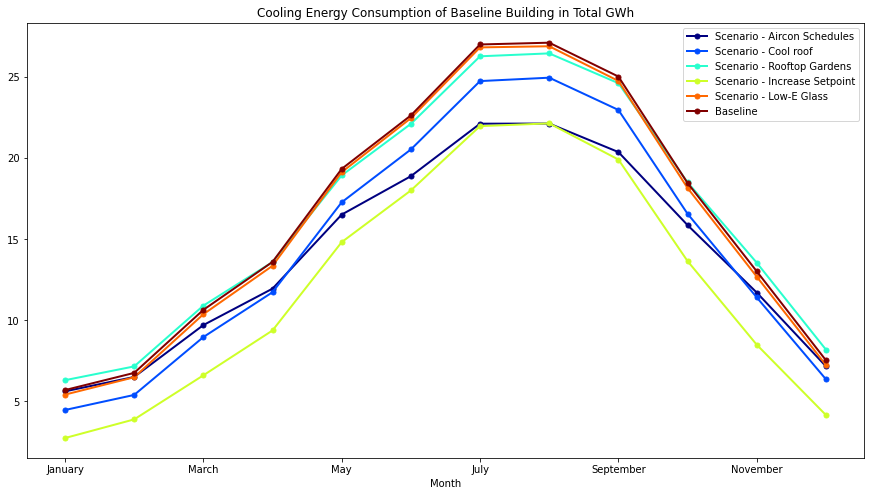

In [85]:
all_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh', figsize=(15,8))

Now we have all the data in one DataFrame, but now what? I think we need to subtract the baseline from each column. I'm not sure how to do that.

In [87]:
data_substrated = all_data.subtract(all_data['Baseline'], axis=0)

In [88]:
data_substrated

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,-0.08,-1.23,0.61,-2.96,-0.28,0.0
February,-0.25,-1.36,0.40,-2.87,-0.27,0.0
March,-0.94,-1.68,0.26,-4.04,-0.27,0.0
April,-1.65,-1.87,-0.01,-4.23,-0.24,0.0
May,-2.82,-2.06,-0.40,-4.52,-0.20,0.0
June,-3.75,-2.10,-0.52,-4.63,-0.17,0.0
July,-4.89,-2.26,-0.73,-5.04,-0.18,0.0
August,-4.99,-2.16,-0.66,-4.98,-0.22,0.0
September,-4.66,-2.06,-0.41,-5.12,-0.27,0.0


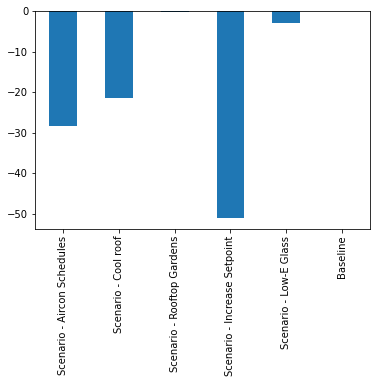

In [91]:
data_substrated.sum().plot.bar()

Turns out that Increasing the setpoing is by far the most effective energy savings option! Schedules are second place and cool roof is third. The Rooftop gardens and Low-E glass seem to have only a bit of impact for this building